# Finding a local minimiser

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

## The Levenberg–Marquardt method

While the Newton–Raphson method converges rapidly to a local minimiser $\boldsymbol{\alpha}$ once the iterates are sufficiently close to $\boldsymbol{\alpha}$, the method can "behave rather badly" if $\mathbf{x}$ is not close to $\boldsymbol{\alpha}$.

The solution to this difficulty is to adapt the Newton–Raphson method to be a line search method to derive the Levenberg–Marquardt method. This method is widely used for non-linear least squares problems, where the extra robustness of this method is beneficial.

The fundamental idea is to search along the line $\mathbf{x}(t) = \mathbf{x} + t \mathbf{s}$ in the search direction $\mathbf{s}$ that is given by the Newton–Raphson search direction found by solving,

$$
\mathbf{H}(\mathbf{x}) \mathbf{s} = \nabla f(\mathbf{x})
$$

The Levenberg–Marquardt method is an example of a descent method, provided $\mathbf{H}(\mathbf{x})$ is positive definite. To see this, we consider the first-order Taylor polynomial approximation for $f$ about $\mathbf{x} \neq \alpha$, which is a good approximation close to $\mathbf{x}$. We have:

$$
f(\mathbf{x} + \epsilon \mathbf{s}) \simeq f(\mathbf{x}) + \epsilon \mathbf{s}^T \nabla f(\mathbf{x}),
$$

so that $\mathbf{s}$ is a descent direction if $\mathbf{s}^T \nabla f(\mathbf{x}) < 0$. Now we merely need to note that for the Newton–Raphson method we have:

$$
\mathbf{s}^T \nabla f(\mathbf{x}) = -\mathbf{s}^T \mathbf{H}(\mathbf{x}) \mathbf{s},
$$

and when $\mathbf{H}(\mathbf{x})$ is positive definite, this is negative. The significance of this result is that, as long as $\mathbf{H}(\mathbf{x})$ is positive definite at each iteration, the Levenberg–Marquardt method converges to a local minimiser, if one exists.

However, there is no guarantee that $\mathbf{H}(\mathbf{x})$ will be positive definite, and we must consider what to do if it is not.

- One alternative would be to abandon the current search and start again with a new initial position, but this is usually a last resort.
- Another alternative would be to choose another search direction that does give a descent direction, such as the steepest descent direction
$$\mathbf{s} = -\nabla f(\mathbf{x})$$

The most popular alternative method is to use a search direction that is a compromise between the Newton–Raphson search direction and the steepest descent search direction, given implicitly by:

$$
\left( \mathbf{H}(\mathbf{x}) + a \mathbf{I} \right) \mathbf{s} = -\nabla f(\mathbf{x})
$$

where the value of $a$ is chosen so that $\mathbf{H}(\mathbf{x}) + a \mathbf{I}$ is a positive definite matrix, ensuring that the direction of search is a descent direction.

We can see that a number $a$ can be found with this property as follows.

- Calculate the $\mathbf{LDL}^T$ decomposition of $\mathbf{H}(\mathbf{x})$ and let the diagonal entries of $\mathbf{D}$ be $d_1, d_2, \dots, d_n$
    - A straightforward calculation shows that the $\mathbf{LDL}^T$ decomposition of $\mathbf{H}(\mathbf{x}) + a \mathbf{I}$ will give a diagonal matrix with diagonal entries $d_1 + a, d_2 + a, \dots, d_n + a$

So if we choose a $a$ to be larger than the absolute value of the most negative $d_i$, then all the diagonal entries will be positive, and hence
$$\mathbf{H}(\mathbf{x}) + a \mathbf{I}$$
will be positive definite. Notice that if $a = 0$, we have the Newton–Raphson search direction, whereas if $a$ is very large, we essentially have the steepest descent search direction since, for large $a$,
$$(\mathbf{H}(\mathbf{x}) + a\mathbf{I})\mathbf{s} \simeq a\mathbf{s}$$


---
&nbsp;
### Procedure - Levenberg–Marquardt Method

To find a local minimiser for a smooth function $f$ of several variables by the Levenberg–Marquardt method, proceed as follows:

1. Determine a starting vector $\mathbf{x}$

2. Find the $\mathbf{LDL}^T$ decomposition of $\mathbf{H}(\mathbf{x})$, where $\mathbf{H}$ is the Hessian matrix for $f$, and use it to determine whether or not $\mathbf{H}(\mathbf{x})$ is positive definite

    - (i) If $\mathbf{H}(\mathbf{x})$ is positive definite, then solve the equation:

      $$
      \mathbf{H}(\mathbf{x}) \mathbf{s} = -\nabla f(\mathbf{x})
      $$

      using the $\mathbf{LDL}^T$ decomposition, to determine the search direction $\mathbf{s}$

    - (ii) If $\mathbf{H}(\mathbf{x})$ is not positive definite, then find some value $a$ such that $\mathbf{H}(\mathbf{x}) + a\mathbf{I}$ is positive definite and solve:

      $$
      (\mathbf{H}(\mathbf{x}) + a\mathbf{I})\mathbf{s} = -\nabla f(\mathbf{x})
      $$

      to determine the search direction $\mathbf{s}$

3. Determine a value of $t$ that minimises $f(\mathbf{x} + t\mathbf{s})$, and set $\widetilde{\mathbf{x}} = \mathbf{x} + t\mathbf{s}$ for this value of $t$.

4. If the convergence criteria are not satisfied, then replace $\mathbf{x}$ with $\widetilde{\mathbf{x}}$ and repeat from step 2.



---
&nbsp;

If, when locating the line minimiser of $f(\mathbf{x} + t\mathbf{s})$, we instead chose a fixed value $t = 1$, then we would recover the basic Newton–Raphson iteration formula. So we expect that having the additional freedom of choosing $t$ will yield a new vector that must be at least as good as the basic Newton–Raphson iterate, and may be significantly better. Moreover, this possibility of improvement is acquired at relatively little extra cost, at least for large problems.

It can be shown that, as the iterates of the Levenberg–Marquardt method get close to a local minimiser, we would expect the values of $t$ obtained in step 3 of Procedure 5 to tend to 1, that is, the iterates should tend to the ordinary Newton–Raphson iterates, and so the rate of convergence of the Levenberg–Marquardt method is quadratic close to a local minimiser.

----
&nbsp;
## Python Implementation
Levenberg–Marquardt iteration implementation

The Levenberg–Marquardt method conducts a repeated line search, similar to that of steepest descent. However, the line search is performed in a direction $\mathbf{s}$ given by

$\displaystyle \quad \mathbf{H}(\mathbf{x}) \, \mathbf{s} = - \boldsymbol{\nabla} f(\mathbf{x}) \quad$ if $\mathbf{H}(\mathbf{x})$ is positive definite, or

$\displaystyle \quad (\mathbf{H}(\mathbf{x}) + a \mathbf{I}) \, \mathbf{s} = - \boldsymbol{\nabla} f(\mathbf{x}) \quad$ otherwise, where $a$ is chosen to ensure that
$\mathbf{H}(\mathbf{x}) + a \mathbf{I}$ is positive definite.

In the implementation below, we take $a$ to be $1.1 \| \mathbf{H}(\mathbf{x}) \|_\infty$, where the $\infty$-norm of a matrix is the largest absolute row sum, that is, the largest number of obtained from summing the absolute values of the elements of each row. This is guaranteed to ensure $\mathbf{H}(\mathbf{x}) + a \mathbf{I}$ is positive definite. (The reasons for this reply on properties of matrices not covered within this module.

Essentially, a matrix is positive definite if all its eigenvalues are positive. If the eigenvalues of $\mathbf{H}$ are $\lambda_1, \lambda_2, \ldots, \lambda_n$, then the eigenvalues of $\mathbf{H} + a\mathbf{I}$ are $\lambda_1 + a, \lambda_2 + a, \ldots, \lambda_n + a$.

So if we choose $a$ larger than the magnitude of the most negative eigenvector,  $\mathbf{H} + a\mathbf{I}$ will be positive definite. It can be shown that the magnitude of all eigenvalues is less than  $\| \mathbf{H} \|_\infty$, so the magnitude of the most negative eigenvalue will be less than $\| \mathbf{H} \|_\infty\,$ , and so taking $a= 1.1 \| \mathbf{H} \|_\infty$ ensures all the eigenvalues of $\mathbf{H} + a\mathbf{I}$ are positive, and so it is positive definite.)

The implementation below uses the same  `ldl_solve` function as used in `newton_raphson` above to solve the system of equations for the search direction, since we already need the $\mathbf{LDL}^T$ decomposition to check for positive definiteness.

It also uses the `line_search` function defined for `steepest_descent` to conduct the line search at each iteration.

In [2]:
from numpy.linalg import norm
from scipy.optimize import minimize_scalar
from Procedures.ldl_decomposition import ldl_decomposition, ldl_solve
from Procedures.LU_functions import forward_substitution, backward_substitution

In [3]:
def plot_contour(f_func, f_symbolic, x_range, y_range,
                 levels=50, cmap='viridis', title=None):
    """
    Plots a contour plot for a given function.

    Parameters
    ----------
    f_func : callable
        Lambdified function to evaluate on the grid.
    f_symbolic : sympy.Expr
        Symbolic representation of the function (for the title).
    x_range : tuple
        Tuple specifying the range for the x-axis (xmin, xmax).
    y_range : tuple
        Tuple specifying the range for the y-axis (ymin, ymax).
    levels : int, optional
        Number of contour levels for the plot (default is 50).
    cmap : str, optional
        Colormap for the contour plot (default is 'viridis').
    title : str, optional
        Custom title for the plot. If None, the title is generated from the function.
    """
    # Generate a meshgrid over the specified range
    x = np.linspace(x_range[0], x_range[1], 100)
    y = np.linspace(y_range[0], y_range[1], 100)
    X, Y = np.meshgrid(x, y)

    # Evaluate the function on the grid
    Z = f_func(X, Y)

    # Create the contour plot
    plt.figure(figsize=(10, 8))
    contour = plt.contourf(X, Y, Z, levels=levels, cmap=cmap)
    plt.colorbar(contour, label='Function Value')  # Add colorbar with label
    plt.contour(X, Y, Z, levels=10, colors='black', linewidths=0.5)  # Overlay contour lines

    # Add axis labels
    plt.xlabel('x')
    plt.ylabel('y')

    # Set the title
    if title is None:
        title = f"Contour Plot\n$f(x, y) = {sp.latex(f_symbolic)}$"
    plt.title(title)

    # Show the plot
    plt.show()

In [4]:
def line_search(f_func, x, s):
    """
    Finds the minimum of the function f, starting from x, in the direction s.

    Arguments:
        f_func - Lambdified function to minimize
        x      - NumPy array (current position)
        s      - NumPy array (search direction)

    Returns:
        Minimiser (NumPy array) and whether the search was successful
    """
    # Define a function of the single variable t, representing f(x + t * s)
    def g(t):
        return f_func(*(x + t * s))  # Unpack x + t * s into f_func

    # Perform the line search
    result = minimize_scalar(g)

    # Update x using the minimiser t
    t_min = result.x
    return x + t_min * s, result.success

In [5]:
def compute_grad_hessian(f, variables, verbose=True):
    """
    Computes symbolic gradient and Hessian matrix of a given Sympy function.

    Parameters
    ----------
    f : sympy.Expr
        The function whose gradient and Hessian we want.
    variables : list of sympy.Symbol
        The variables with respect to which we differentiate.
    verbose : bool, optional
        If True, print the symbolic gradient and Hessian.

    Returns
    -------
    gradient : sympy.Matrix
        The symbolic gradient (column vector).
    Hessian : sympy.Matrix
        The symbolic Hessian matrix.
    """
    gradient = sp.Matrix([sp.diff(f, var) for var in variables])
    if verbose:
        print("Gradient:")
        display(gradient)

    Hessian = sp.Matrix([
        [sp.diff(f, var1, var2) for var2 in variables]
        for var1 in variables
    ])

    if verbose:
        print("\nHessian")
        display(Hessian)
        print()

    return gradient, Hessian

In [6]:
def levenberg_marquardt(f, x0, variables, epsilon=0.5e-4, delta=0.5e-4, eta=0.5e-4,
                   maxiter=100, verbose=False):
    """
    Minimize a scalar function f(x) using the Levenberg Marquardt method.

    Parameters
    ----------
    f : sympy.Expr
        The scalar function to be minimized. Should be a function of
        the variables in `variables`.
    x0 : array_like
        The initial guess for the minimizer (e.g., [x0, y0, ...]).
    variables : list of sympy.Symbol
        The variables (in order) for f.
    epsilon : float, optional
        Convergence tolerance on the norm of the step: ||x_{k+1} - x_k||.
    delta : float, optional
        Convergence tolerance on the absolute change in function values:
        |f(x_{k+1}) - f(x_k)|.
    eta : float, optional
        Convergence tolerance on the norm of the gradient: ||∇f(x_k)||.
    maxiter : int, optional
        Maximum number of iterations to attempt.
    verbose : bool, optional
        If True, prints diagnostic information at each iteration.

    Returns
    -------
    result : dict
        A dictionary containing:
        - 'x_min': np.ndarray, the estimated minimizer.
        - 'iterations': int, the number of iterations taken.
        - 'success': bool, whether the method converged successfully.
        - 'f_min': float, the function value at the final point.
        - 'reason': str, a message describing why the method terminated.
    """
    # obtain the size of the problem, H will be n x n
    n = len(x0)

    # copy the given x0 into the array x
    x = np.array(x0, dtype=float)

    # Prepare numeric versions of f, gradient, and Hessian (only done once)
    f_func = sp.lambdify(variables, f, 'numpy')

    gradient_sym, hessian_sym = compute_grad_hessian(f, variables, verbose)
    grad_f = [sp.lambdify(variables, g, 'numpy') for g in gradient_sym]
    hessian_f = sp.lambdify(variables, hessian_sym, 'numpy')

    # Evaluate the function at the initial point
    f_current = f_func(*x)

    # Main iteration loop
    for iteration in range(maxiter):
        # Evaluate gradient
        grad_eval = np.array([g(*x) for g in grad_f])

        # Check gradient-norm stopping criterion
        if norm(grad_eval, 2) < eta:
            return {
                'x_min': x,
                'iterations': iteration,
                'success': True,
                'f_min': f_current,
                'reason': 'Gradient norm below tolerance'
            }

        # Evaluate Hessian and do LDL^T decomposition
        H_eval = np.array(hessian_f(*x))
        L, D, p = ldl_decomposition(H_eval, verbose=verbose)

        # if not positive definite, update H to be H + a I,
        # and recalculate the LDL^T decomposition
        if np.any(np.diag(D) <= 0):
            H_eval = H_eval + 1.1 * norm(H_eval, np.inf) * np.identity(n)
            L, D, p = ldl_decomposition(H_eval, verbose=verbose)

        # Solve H_eval * d = -grad_eval using LDL^T
        d = ldl_solve(L, D, p, -grad_eval)

        # Perform line search in the direction d
        x_new, success = line_search(f_func, x, d)
        if not success:
            return {
                'x_min': x,
                'iterations': iteration,
                'success': False,
                'f_min': f_current,
                'reason': 'Line search failed'
            }

        # Evaluate the function at the new point
        f_new = f_func(*x_new)

        # Diagnostic prints
        if verbose:
            print(f"Iteration {iteration + 1}: x = {x_new}, f(x) = {f_new}")

        # Check for small step size and small function-value change
        if norm(x_new - x, 2) < epsilon and abs(f_new - f_current) < delta:
            return {
                'x_min': x_new,
                'iterations': iteration + 1,
                'success': True,
                'f_min': f_new,
                'reason': 'Change in x and f(x) below tolerances'
            }

        # Accept the new point
        x = x_new
        f_current = f_new

    # If we exit the loop, we haven't converged within maxiter
    return {
        'x_min': x,
        'iterations': maxiter,
        'success': False,
        'f_min': f_current,
        'reason': 'Exceeded maximum iterations'
    }

----
&nbsp;
### Example 1

Use the Levenberg–Marquardt method to find the minimiser, to six decimal places, of the function

$$f(x,y) = 2x^3 - 2xy + 3y^2-10y + 12$$

In this example we are not given a starting point, so we start by plotting a contour map to locate an approximate location for the minimiser.

In [7]:
# Define the variables
x, y = sp.symbols('x y')
variables = [x, y]

# Define function
f = 2*x**3 - 2*x*y + 3*y** 2 - 10*y + 12
# Lambdify for plotting
f_func = sp.lambdify([x, y], f, 'numpy')
display(f)

2*x**3 - 2*x*y + 3*y**2 - 10*y + 12

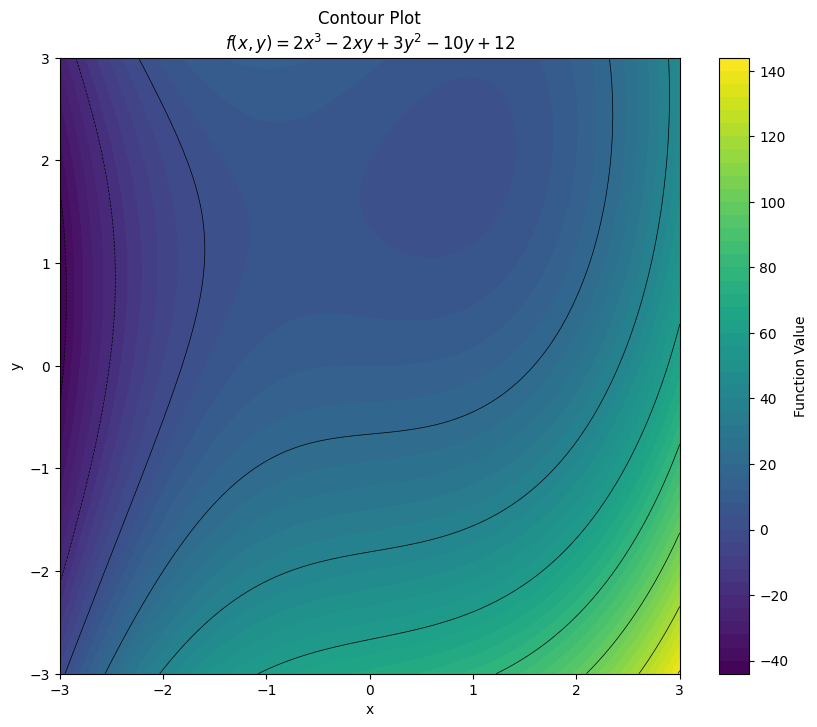

In [8]:
plot_contour(f_func, f, (-3, 3), (-3, 3))

Based on the contour plot we could start around $\mathbf{x}_0 = (1, 2)$

As we are benchmarking this against Newton-Raphson, we start at the same point.

In [9]:
# Define the initial point
x0 = [3, 0]

In [10]:
result = levenberg_marquardt(f, x0=x0, variables=variables,
                                 epsilon=0.5e-6, delta=0.5e-6, eta=0.5e-6,
                                 verbose=True)
minimiser = result['x_min']
print()
for key, value in result.items():
    print(f"{key} : {value}")

print("\nPerformance")
%timeit levenberg_marquardt(f, x0=x0, variables=variables, epsilon=0.5e-6, delta=0.5e-6, eta=0.5e-6, verbose=False)

Gradient:


Matrix([
[   6*x**2 - 2*y],
[-2*x + 6*y - 10]])


Hessian


Matrix([
[12*x, -2],
[  -2,  6]])


Iteration 1: x = [1.33497673 2.66859893], f(x) = 4.311528453211597
Iteration 2: x = [0.86152282 1.88503291], f(x) = 1.8406020130243803
Iteration 3: x = [0.80403924 1.93598001], f(x) = 1.8106370331590256
Iteration 4: x = [0.80297949 1.93432603], f(x) = 1.8106269187115949
Iteration 5: x = [0.80297911 1.93432637], f(x) = 1.8106269187103265

x_min : [0.80297911 1.93432637]
iterations : 5
success : True
f_min : 1.8106269187103265
reason : Gradient norm below tolerance

Performance
2.3 ms ± 28.8 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


----
&nbsp;
### Example 2

Starting at $(-1.2,1)$, compute the minimiser, to six decimal places, of Rosenbrock's function

$$f(x,y) =  100(y - x^2)^2 + (1 - x)^2$$

using the Levenberg–Marquardt method.

In [11]:
# Define the variables
x, y = sp.symbols('x y')
variables = [x, y]

# Define the initial point
x0 = [-1.2, 1]

# Define function
f = 100*(y - x**2)**2 + (1 - x)**2
# Lambdify for later
f_func = sp.lambdify([x, y], f, 'numpy')
display(f)

(1 - x)**2 + 100*(-x**2 + y)**2

In [12]:
result = levenberg_marquardt(f, x0=x0, variables=variables,
                               epsilon=0.5e-6, delta=0.5e-6, eta=0.5e-6,
                               verbose=True)
minimiser = result['x_min']
print()
for key, value in result.items():
    print(f"{key} : {value}")

Gradient:


Matrix([
[-400*x*(-x**2 + y) + 2*x - 2],
[           -200*x**2 + 200*y]])


Hessian


Matrix([
[2*(600*x**2 - 200*y + 1), -400*x],
[                  -400*x,    200]])


Iteration 1: x = [-1.17517744  1.38226744], f(x) = 4.731547058087791
Iteration 2: x = [-0.95950175  0.87526132], f(x) = 4.045602426122242
Iteration 3: x = [-0.68974845  0.42055666], f(x) = 3.1599126080779123
Iteration 4: x = [-0.33388559  0.06959396], f(x) = 1.9546913481116277
Iteration 5: x = [-0.05079191 -0.03609002], f(x) = 1.2536992883120992
Iteration 6: x = [0.23894563 0.02760356], f(x) = 0.6661783440560566
Iteration 7: x = [0.48216682 0.20885332], f(x) = 0.323996085127117
Iteration 8: x = [0.70731766 0.48481075], f(x) = 0.10964927069900578
Iteration 9: x = [0.88430005 0.77355009], f(x) = 0.02050392586141154
Iteration 10: x = [1.00303761 1.00681595], f(x) = 6.273764723540854e-05
Iteration 11: x = [0.99962259 0.99926308], f(x) = 1.7401129055521832e-07
Iteration 12: x = [0.99999969 0.99999932], f(x) = 5.124732821866797e-13
Iteration 13: x = [1. 1.], f(x) = 1.0146597286593994e-23

x_min : [1. 1.]
iterations : 13
success : True
f_min : 1.0146597286593994e-23
reason : Gradient norm be

The `newton_raphson` function saw convergence in 6 iterations...

Why Newton–Raphson Performed Better:

**Rosenbrock’s Function**:

- Near the minimiser $(1, 1)$, Rosenbrock’s function is smooth with a well-behaved Hessian. Newton–Raphson exploits this structure effectively to converge in fewer iterations.
- Levenberg–Marquardt’s iterative modification of the Hessian (adding $a\mathbf{I}$) adds robustness but slows down convergence in such well-behaved cases.

**Search Direction**:

- Newton–Raphson uses the exact Hessian to compute the search direction, while Levenberg–Marquardt compromises between steepest descent and the Newton–Raphson direction, which can take longer to converge when the problem is simple.

**Line Search**:

- Levenberg–Marquardt performs a line search at every step, which adds computational overhead and potentially redundant iterations when the Newton–Raphson step is already optimal.





----